## Just some simple EDA to check if the merge went well

In [2]:
import pandas as pd

df = pd.read_csv("C:\\Users\\roosd\\Downloads\\econometrie jaar 3\\TIC\\Spring2026-TIC\\data\\merged_prices_weather.csv", parse_dates=["date"])

print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())

print("\nInfo:")
df.info()


Shape: (15801, 49)

Columns:
['soybean_Close', 'soybean_Volume', 'soybean_log_return', 'date', 'corn_Close', 'corn_Volume', 'corn_log_return', 'temperature_2m_mean', 'precipitation_sum', 'dew_point_2m_mean', 'cloud_cover_mean', 'cloud_cover_max', 'dew_point_2m_max', 'dew_point_2m_min', 'cloud_cover_min', 'apparent_temperature_mean', 'et0_fao_evapotranspiration_sum', 'relative_humidity_2m_mean', 'relative_humidity_2m_min', 'relative_humidity_2m_max', 'snowfall_water_equivalent_sum', 'pressure_msl_mean', 'pressure_msl_max', 'pressure_msl_min', 'surface_pressure_mean', 'surface_pressure_min', 'winddirection_10m_dominant', 'surface_pressure_max', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_speed_10m_mean', 'wind_gusts_10m_mean', 'wind_gusts_10m_min', 'wind_speed_10m_min', 'wet_bulb_temperature_2m_mean', 'wet_bulb_temperature_2m_max', 'vapour_pressure_deficit_max', 'soil_moisture_0_to_7cm_mean', 'soil_moisture_0_to_100cm_mean', 'wet_bulb_temperature_2m_min', 'soil_moisture_7_to_28cm_m

## Check date coverage & duplicates

In [4]:
print("Date range:")
print(df["date"].min(), "→", df["date"].max())

print("\nRows per date (should be >1 because of the different locations):")
print(df.groupby("date").size().describe())


Date range:
2005-01-03 00:00:00 → 2026-02-02 00:00:00

Rows per date (should be >1 because of the different locations):
count    5305.000000
mean        2.978511
std         0.206215
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
dtype: float64


## Verify prices are identical within each date

In [5]:
price_cols = [
    "soybean_Close", "soybean_Volume", "soybean_log_return",
    "corn_Close", "corn_Volume", "corn_log_return"
]

# Count how many unique price values per date
price_variation = (
    df.groupby("date")[price_cols]
      .nunique()
)

print("Max unique values per date (should all be 1):")
print(price_variation.max())


Max unique values per date (should all be 1):
soybean_Close         1
soybean_Volume        1
soybean_log_return    1
corn_Close            1
corn_Volume           1
corn_log_return       1
dtype: int64


## Missing value check

In [6]:
missing = df.isna().mean().sort_values(ascending=False)

print("Top columns by % missing:")
print(missing.head(15))


Top columns by % missing:
temperature_2m_mean               0.003607
apparent_temperature_mean         0.003607
precipitation_sum                 0.003607
cloud_cover_min                   0.003607
dew_point_2m_min                  0.003607
dew_point_2m_max                  0.003607
cloud_cover_max                   0.003607
cloud_cover_mean                  0.003607
dew_point_2m_mean                 0.003607
et0_fao_evapotranspiration_sum    0.003607
pressure_msl_min                  0.003607
pressure_msl_max                  0.003607
pressure_msl_mean                 0.003607
snowfall_water_equivalent_sum     0.003607
relative_humidity_2m_max          0.003607
dtype: float64


## Location check

In [7]:
print("Number of locations:", df["Location_ID"].nunique())

print("\nRows per location (first 10):")
print(df["Location_ID"].value_counts().head(10))

print("\nLatitude/Longitude consistency check:")
print(
    df.groupby("Location_ID")[["Latitude", "Longitude"]]
      .nunique()
      .head()
)


Number of locations: 3

Rows per location (first 10):
Location_ID
1.0    5248
2.0    5248
3.0    5248
Name: count, dtype: int64

Latitude/Longitude consistency check:
             Latitude  Longitude
Location_ID                     
1.0                 1          1
2.0                 1          1
3.0                 1          1


## Visual check

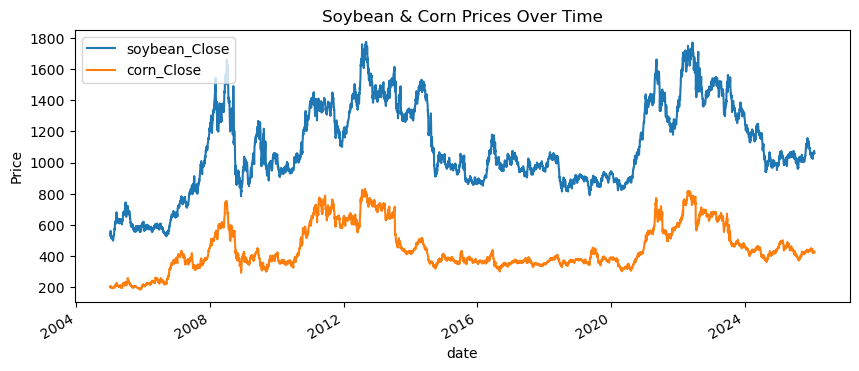

In [8]:
import matplotlib.pyplot as plt

# Price time series (collapse locations)
daily_prices = df.groupby("date")[["soybean_Close", "corn_Close"]].mean()

daily_prices.plot(figsize=(10, 4))
plt.title("Soybean & Corn Prices Over Time")
plt.ylabel("Price")
plt.show()


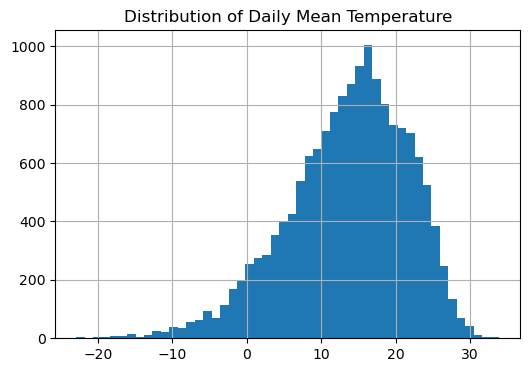

In [9]:
# Temperature distribution
df["temperature_2m_mean"].hist(bins=50, figsize=(6, 4))
plt.title("Distribution of Daily Mean Temperature")
plt.show()
